# <span style='color:OrangeRed'>V8 REGELUNG IM ZUSTANDSRAUM - TEIL 1</span>

In [2]:
% Necessary to use control toolbox
pkg load control
clear all

% Set the Octsim Engine to run the simulation
addpath('../Octsim');


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das Zustandsraummodell eines Wechselstrommotors kann vereinfacht wie folgt beschrieben werden:

In [3]:
A = [0 1;0 -1]
B = [0; 1]
C = [1 0]
D = 0

A =

   0   1
   0  -1

B =

   0
   1

C =

   1   0

D = 0


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für das System des Wechselstrommotors soll ein Zustandsregler ausgelegt
werden.</p>
a1) Überprüfen Sie zunächst, ob das System steuerbar ist.</p>
a2) Berechnen Sie den Verstärkungsfaktor des Zustandsreglers, sodass das charakteristische
Sollpolynom des geschlossenen Regelkreises P(s) = (s + 2 + 2j)(s + 2 − 2j)
beträgt.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Steuerbarkeitmatrix des Systems lautet:

In [4]:
Sc = [B A*B]

Sc =

   0   1
   1  -1



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Um Steuerbarkeit zu überprüfen, berechnen wir die Determinante:

In [5]:
det(Sc)

ans = -1


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Weil die Determinante nicht null ist, ist das System steuerbar.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Pole sollen sein:

In [6]:
p1 = -2-2*1j;
p2 = -2+2*1j;
p = [p1 p2]


p =

  -2 - 2i  -2 + 2i



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Verstärkungsmatrix können wir so berechnen:

In [7]:
K = place(A,B,p)

K =

   8   3



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Durch eine Simulation können wir unser Ergebnis testen.

xo =

   2
   2



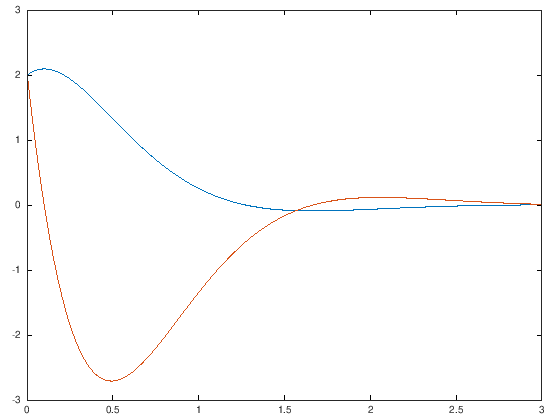

In [8]:
% Simulation Parameters
% Start time
tini = 0;
% End time
tfinal = 3;
% Time Step
dt = 0.001;
% Number of data flows in the schematic
nflows = 3;


% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);

% We measure both state variables
Cs = eye(2);

% Initial Conditions
xo = [2; 2]

% List of components
c1{1} = StateSpace(1,[2 3],A,B,Cs,D,xo);
c1{2} = Gain([2 3],1,-K);


sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([2 3]);
plot(out1(1,:),out1(2,:),out1(1,:),out1(3,:));

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir können auch die "Symbolic Toolbox" benutzen.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir definieren die Zustandsmatrix für den geschlossenen Regelkreis:

In [9]:
pkg load symbolic
syms Kf f1 f2

Kf = [f1 f2]
Acl = A-B*Kf

Symbolic pkg v2.9.0: Python communication link active, SymPy v1.5.1.
Kf = (sym) [f₁  f₂]  (1×2 matrix)
Acl = (sym 2×2 matrix)

  ⎡ 0      1   ⎤
  ⎢            ⎥
  ⎣-f₁  -f₂ - 1⎦



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir berechnen das charakteristische Polynom als Funktion der Variablen s.

In [10]:
syms s
P1 = det(s*eye(2)-Acl)
P1 = simplify(P1)

P1 = (sym) f₁ + s⋅(f₂ + s + 1)
P1 = (sym) f₁ + s⋅(f₂ + s + 1)


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Mit den gewünschten Polwerten ergibt sich das gewünschte charakteristische Polynom.

In [11]:
P2 = (s-p1)*(s-p2)
P2 = simplify(P2)

P2 = (sym) (s + 2 - 2⋅ⅈ)⋅(s + 2 + 2⋅ⅈ)
P2 = (sym)

   2          
  s  + 4⋅s + 8



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
P1 und P2 müssen gleich sein, d.h. die Koeffizienten müssen für die beiden Polynome gleich sein.

In [21]:
Pc1 = sym2poly(P1,s)
Pc2 = sym2poly(P2,s)

Pc1 = (sym) [1  f₂ + 1  f₁]  (1×3 matrix)
Pc2 = (sym) [1  4  8]  (1×3 matrix)


In [23]:
vpasolve([Pc1(2)==Pc2(2),Pc1(3)==Pc2(3)],[f1,f2])

ans = (sym 2×1 matrix)

  ⎡8.0⎤
  ⎢   ⎥
  ⎣3.0⎦

